In [ ]:
try:
    import hypersweeper
except ImportError as e:
    %pip install hypersweeper
try:
    import pandas as pd
except ImportError as e:
    %pip install pandas
try:
    import matplotlib
except ImportError as e:
    %pip install matplotlib
import numpy as np

## Black-Box Hyperparameter Optimization With ARLBench

The most common way of optimizing hyperparameters is probably black-box optimization, i.e. using a reward or cost as the sole decision factor for a configuration's quality.
There are many great tools that do this integrated into hydra, so let's use one to tune our trusty CartPole DQN: the Hypersweeper.

First, let's use the provided runscript to do a random search:

In [ ]:
!python run_arlbench.py --config-name=random_search --multirun

Now let's look how well the random search worked, let's plot the performance of each configuration:

<Axes: title={'center': 'Configuration Performance over Time'}, xlabel='config_id'>

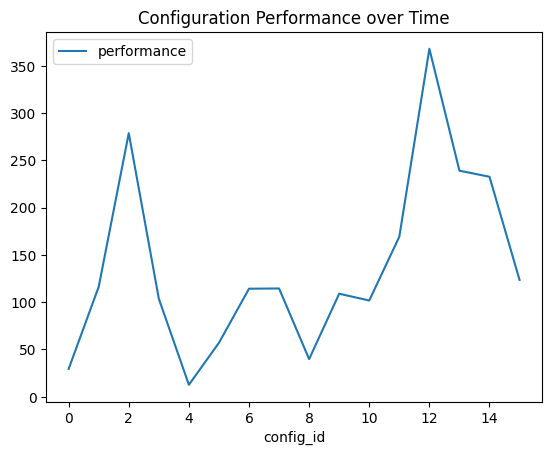

In [12]:
results_file = 'results/sobol/dqn_CartPole-v1/42/runhistory.csv'
runhistory = pd.read_csv(results_file)
runhistory.plot(x='config_id', y='performance', kind='line', title='Configuration Performance over Time')

And what worked best?

In [13]:
print("Best performance: ", np.round(max(runhistory['performance']), decimals=2))
print("")
print(runhistory.loc[runhistory['performance'].idxmax()])

Best performance:  367.92

config_id                                  12
budget                                    NaN
performance                         367.92447
performance_seed_42                     500.0
performance_seed_43                     500.0
performance_seed_44                 103.77344
hp_config.buffer_batch_size                16
hp_config.buffer_prio_sampling           True
hp_config.buffer_size                 4539313
hp_config.initial_epsilon             0.73531
hp_config.learning_rate              0.019303
hp_config.learning_starts                 441
hp_config.target_epsilon              0.08692
hp_config.use_target_network            False
hp_config.buffer_alpha               0.834983
hp_config.buffer_beta                0.405663
hp_config.buffer_epsilon             0.000361
hp_config.target_update_interval          NaN
hp_config.tau                             NaN
Name: 12, dtype: object


Now let's try a different optimizer, how about SMAC:

In [ ]:
!python run_arlbench.py --config-name=smac -m

How did this one do compared to random search?

<Axes: title={'center': 'Configuration Performance over Time'}, xlabel='config_id'>

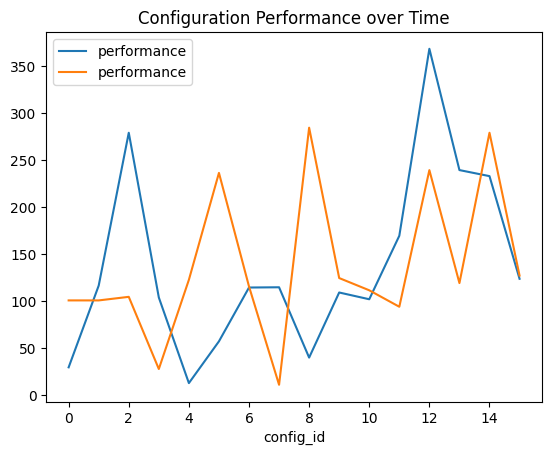

In [17]:
results_file_smac = 'results/smac/dqn_CartPole-v1/0/42/runhistory.csv'
runhistory_smac = pd.read_csv(results_file_smac)
ax = runhistory.plot(x='config_id', y='performance', kind='line', title='Configuration Performance over Time')
runhistory_smac.plot(x='config_id', y='performance', kind='line', title='Configuration Performance over Time', ax=ax)

In [18]:
print("Best performance: ", np.round(max(runhistory_smac['performance']), decimals=2))
print("")
print(runhistory.loc[runhistory_smac['performance'].idxmax()])

Best performance:  284.07

config_id                                   8
budget                                    NaN
performance                          39.79948
performance_seed_42                   81.3125
performance_seed_43                 28.765625
performance_seed_44                  9.320312
hp_config.buffer_batch_size                16
hp_config.buffer_prio_sampling          False
hp_config.buffer_size                 9510026
hp_config.initial_epsilon             0.91128
hp_config.learning_rate              0.000097
hp_config.learning_starts                 673
hp_config.target_epsilon             0.050635
hp_config.use_target_network             True
hp_config.buffer_alpha                    NaN
hp_config.buffer_beta                     NaN
hp_config.buffer_epsilon                  NaN
hp_config.target_update_interval        516.0
hp_config.tau                        0.968286
Name: 8, dtype: object
